In [1]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 49kB/s 
     |████████████████████████████████| 3.8MB 31.8MB/s 
     |████████████████████████████████| 450kB 50.6MB/s 
     |████████████████████████████████| 81kB 11.0MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [0]:
import h5py as h5

In [4]:
tf.__version__

'2.0.0'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = "/content/drive/My Drive/Great Learning/SVHN_single_grey1.h5"

In [0]:
df = h5.File(path,'r')

In [0]:
dfkey= list(df.keys())

In [72]:
dfkey

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [0]:
X_test = np.array(df.get('X_test'))
X_train = np.array(df.get('X_train'))
X_val = np.array(df.get('X_val'))
y_test = np.array(df.get('y_test'))
y_train = np.array(df.get('y_train'))
y_val = np.array(df.get('y_val'))

In [74]:
X_train[0].shape

(32, 32)

In [75]:
X_train.shape

(42000, 32, 32)

In [76]:
print (X_test.shape)
print (X_test[0].shape)

(18000, 32, 32)
(32, 32)


In [77]:
X_val.shape

(60000, 32, 32)

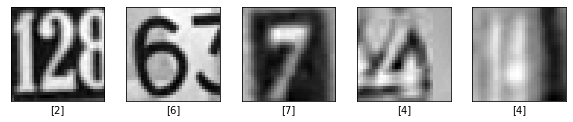

In [78]:
#train set
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel([y_train[i]])
plt.show()

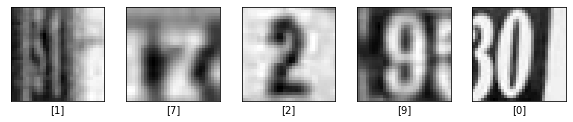

In [79]:
#test set
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i],cmap='gray')
    plt.xlabel([y_test[i]])
plt.show()

In [0]:
y_test1 = tf.keras.utils.to_categorical(y_test)
y_train1 = tf.keras.utils.to_categorical(y_train)
y_val1 = tf.keras.utils.to_categorical(y_val)

In [81]:
print('y Train first 5 data: ', y_train1[0])

y Train first 5 data:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
X_train1 = X_train/255
X_test1 = X_test/255
X_val1 = X_val/255

In [0]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Reshape
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.metrics import Accuracy

In [0]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32*32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
# add Batch Normalization
model.add(tf.keras.layers.BatchNormalization())

#first Hidden layer
model.add(Dense(256,activation='relu'))

#second Hidden layer
model.add(Dense(128,activation='relu'))

#normalizing 
model.add(BatchNormalization())

#third Hidden layer
model.add(Dense(16,activation='relu'))

#Normalization
model.add(BatchNormalization())

# Final layer with activation function as softmax and 10 neurons 
model.add(Dense(10, activation='softmax'))

# Create optimizer with non-default learning rate
sgd_optimizer = SGD(lr=0.03)

# Compile the model
model.compile('sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [85]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                6

In [86]:
m1 = model.fit(X_train1,y_train1,          
          validation_data=(X_val1,y_val1),
          epochs=10,
          batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/10
42000/42000 [==============================] - 15s 361us/sample - loss: 1.8620 - accuracy: 0.3619 - val_loss: 1.3340 - val_accuracy: 0.5877
Epoch 2/10
42000/42000 [==============================] - 14s 333us/sample - loss: 1.2815 - accuracy: 0.5914 - val_loss: 0.9638 - val_accuracy: 0.7064
Epoch 3/10
42000/42000 [==============================] - 13s 321us/sample - loss: 1.0858 - accuracy: 0.6543 - val_loss: 0.8484 - val_accuracy: 0.7410
Epoch 4/10
42000/42000 [==============================] - 14s 330us/sample - loss: 0.9758 - accuracy: 0.6879 - val_loss: 0.8003 - val_accuracy: 0.7501
Epoch 5/10
42000/42000 [==============================] - 14s 333us/sample - loss: 0.8919 - accuracy: 0.7171 - val_loss: 0.7790 - val_accuracy: 0.7604
Epoch 6/10
42000/42000 [==============================] - 14s 337us/sample - loss: 0.8310 - accuracy: 0.7375 - val_loss: 0.7470 - val_accuracy: 0.7674
Epoch 7/10
42000/42000 [====================

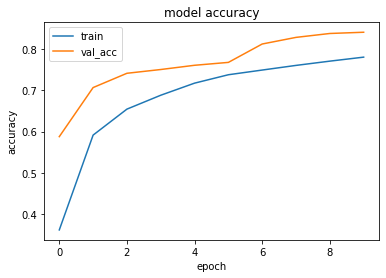

In [87]:
# accuracy
plt.plot(m1.history['accuracy'])
plt.plot(m1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val_acc'], loc='upper left')
plt.show()

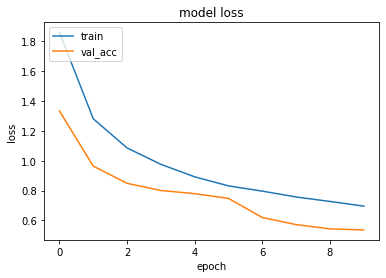

In [88]:
#loss
plt.plot(m1.history['loss'])
plt.plot(m1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_acc'], loc='upper left')
plt.show()

In [0]:
#prediction on test data
y_pred = model.predict(X_test1)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
test1 = tf.cast(X_test1, tf.float32)

In [92]:
print(confusion_matrix(model.predict_classes(test1), y_test))

[[1541   30   15   18   29   24   58   28   36   67]
 [  37 1492   41   41   69   30   33   70   52   44]
 [   3   29 1449   28   24   12   11   43   29   19]
 [  33   76   63 1341   37  111   33   35   66   57]
 [  19   44   26   13 1518    6   42   12   16   17]
 [   9   13   14  136   15 1440  100   12   49   41]
 [  24   19    6   20   32   53 1431   13   94    9]
 [  28   75   89   43   19   15   16 1568   16   27]
 [  24   18   32   31   16   31   75    5 1373   37]
 [  96   32   68   48   53   46   33   22   81 1486]]


In [93]:
print(classification_report(model.predict_classes(test1),y_test))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1846
           1       0.82      0.78      0.80      1909
           2       0.80      0.88      0.84      1647
           3       0.78      0.72      0.75      1852
           4       0.84      0.89      0.86      1713
           5       0.81      0.79      0.80      1829
           6       0.78      0.84      0.81      1701
           7       0.87      0.83      0.85      1896
           8       0.76      0.84      0.80      1642
           9       0.82      0.76      0.79      1965

    accuracy                           0.81     18000
   macro avg       0.81      0.82      0.81     18000
weighted avg       0.81      0.81      0.81     18000

